# Jane Chinwuko
# Batch number: DS2307

We shall be using the Titanic Survival dataset.

#### Project Description:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 



#### Attribute Information:

Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
#Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

In [2]:
#Load the dataset from the system
titanic_surv = pd.read_csv('titanic_train.csv')

In [3]:
#Viewing the first 10 rows of the dataset
titanic_surv.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We have NaN in our dataset to deal with. We shall be converting most of the columns to numerical datatype to enable us train our model.

In [4]:
#display the dimension of our dataset
titanic_surv.shape

(891, 12)

This dataset contains 891 rows and 12 columns (made up of the independent and target variables)

In [5]:
#Viewing the columns present in the dataset
columns = titanic_surv.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Displays the basic information about the columns in the dataset
titanic_surv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Two of the features are floats, five are integers and five are objects datatypes. Our target variable is the Survived column.

In [7]:
#displaying the descriptive statistics of all the features in the dataset
titanic_surv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that there are missing values in the Age column. About 38% of the passengers survived. The age of the passengers were between 0.4 to 80. A passenger had upto 8 family members on board. The highest fare paid is 512.329200. 

In [8]:
#displaying the descriptive statistics of our categorical variables
titanic_surv.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
#Displays the unique value for the features in the dataset
titanic_surv.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
#checking for missing values
titanic_surv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there are null values in the Age, Cabin and Embarked column

In [11]:
#This returns the count of unique occurrences in the sex column.
titanic_surv['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We have more males in the ship than female.

In [12]:
#This returns the count of unique occurrences in the Survived column.
titanic_surv['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 passengers did not survive while 342 survived.

In [13]:
# Display the count of survivals by their sex
titanic_surv['Sex'].groupby([titanic_surv['Survived']]).value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

468 males and 81 female did not survive. 233 female and 109 males survived. 

In [14]:
# Maximum age by sex
titanic_surv['Age'].groupby([titanic_surv['Sex']]).max()

Sex
female    63.0
male      80.0
Name: Age, dtype: float64

The oldest male passenger was 80 years old. While the oldest female passenger was 63 years.

In [15]:
# Minimum age by sex
titanic_surv['Age'].groupby([titanic_surv['Sex']]).min()

Sex
female    0.75
male      0.42
Name: Age, dtype: float64

The youngest male passenger was 0.42 years and youngest female was 0.75 years.

In [16]:
# Average age by survivals
titanic_surv['Age'].groupby([titanic_surv['Survived']]).mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Average age of the passengers that survived is 28.4 years while the average age of the passenger that did not survive is 30.6 years.

In [17]:
# Average age by males and females of those that survived or did not survive
titanic_surv['Age'].groupby([titanic_surv['Survived'],titanic_surv['Sex']]).mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

For females, the average age of the passengers that survived is about 28.70 years while male is about 27.78 years.  The average of females that did not survive is about 25.65 years while for male is about 31.4 years

In [18]:
# Display the count of the fare the passenger paid
titanic_surv['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

43 passengers paid 8.0500 while 42 passengers paid 13.0000.

<function matplotlib.pyplot.show(close=None, block=None)>

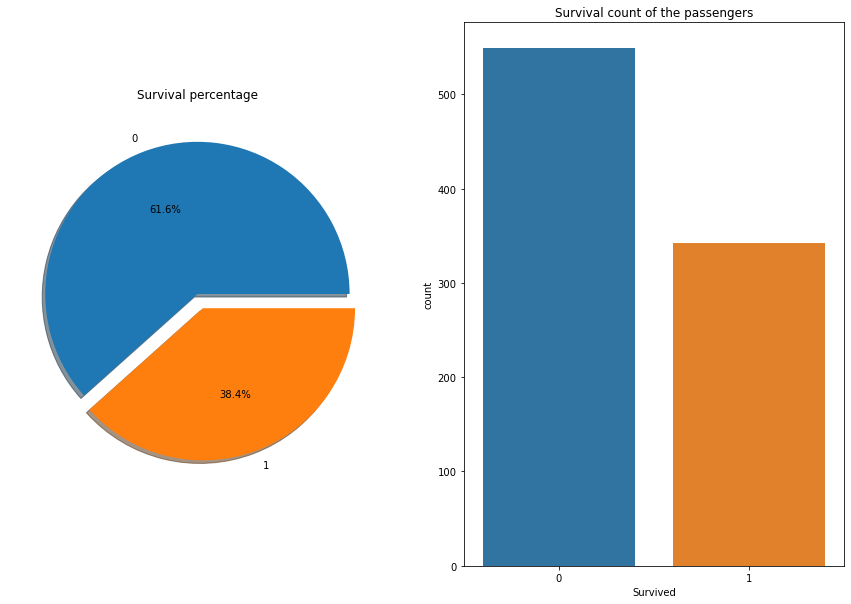

In [19]:
# This pieplot shows the percentage of the survivals
f, ax = plt.subplots(1,2, figsize = (15,10))
titanic_surv['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('Survival percentage')
ax[0].set_ylabel('')

# This countplot shows the distribution of the passenger whether they survived or not
sns.countplot(x ='Survived', data = titanic_surv,  ax = ax[1])
ax[1].set_title('Survival count of the passengers')
plt.show

From the pie plot, we can see that 61.6% of the passengers did not survive. That means that about 342 out of the 891 passengers survived.

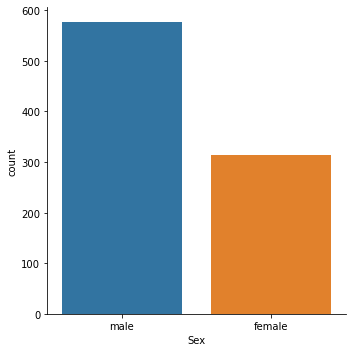

In [20]:
# This catplot shows the distribution of sex of the passengers.
sns.catplot(x ='Sex', data = titanic_surv, kind = 'count')

We have more males than females on board

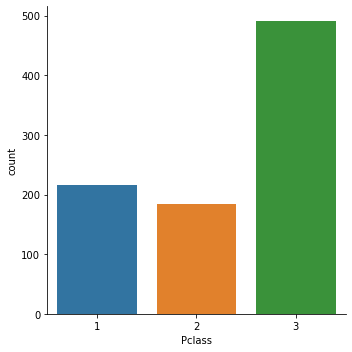

In [21]:
# This catplot shows the distribution of the passenger by Pclass(1st, 2nd or 3rd class)
sns.catplot(x ='Pclass', data = titanic_surv, kind = 'count')

We have more passengers in the 3rd class than other classes.

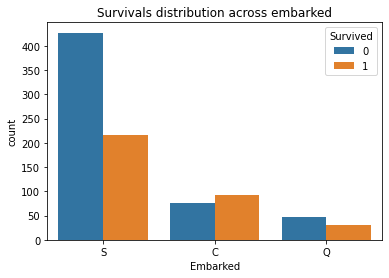

In [22]:
# countplot showing the ports the passengers(survived or did not survive) boarded from
sns.countplot(x='Embarked', hue='Survived', data=titanic_surv)
plt.title('Survivals distribution across embarked')
plt.show()

(C = Cherbourg; Q = Queenstown; S = Southampton)

Most of the passengers that boarded from S did not survive compared with other ports. Also, more of the survivals also boarded from port S.

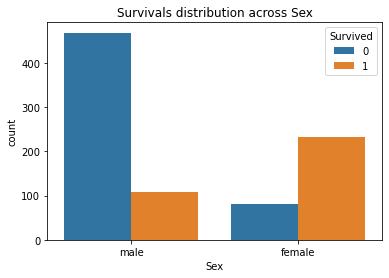

In [23]:
# countplot showing the sex of the passengers(survived or did not survive)
sns.countplot(x='Sex', hue='Survived', data=titanic_surv)
plt.title('Survivals distribution across Sex')
plt.show()

We can see that more females survived than male. And more males did not survive.

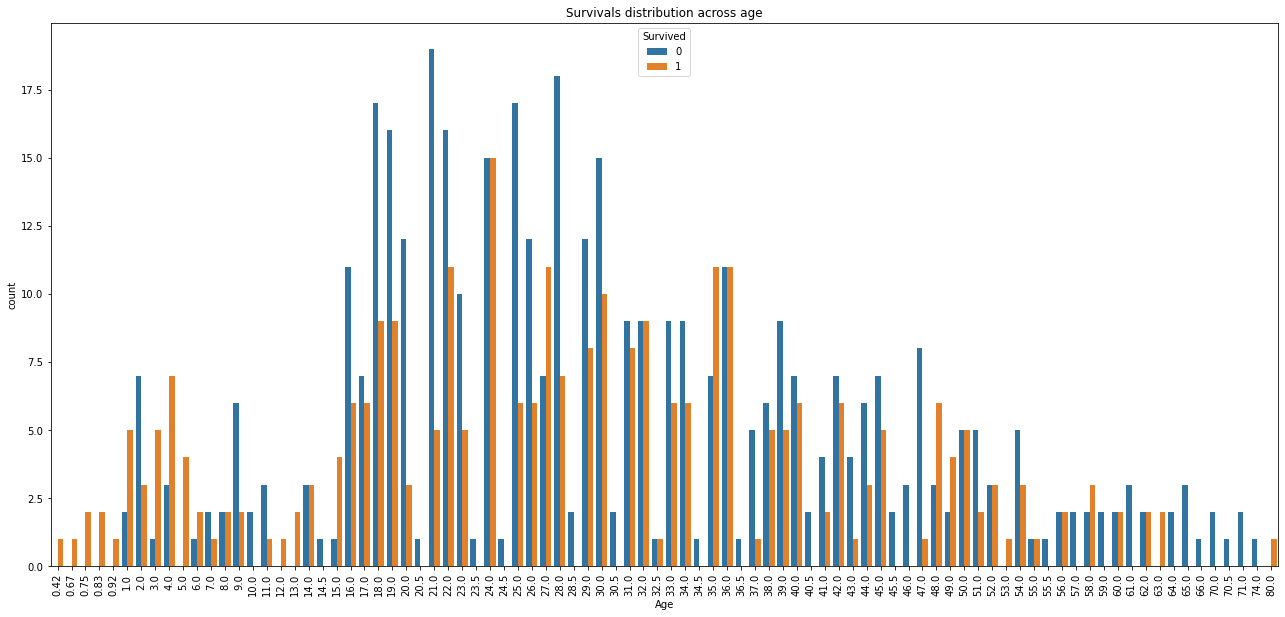

In [24]:
# countplot showing the sex of the passengers(survived or did not survive)
plt.figure(figsize = (22,10))
sns.countplot(x='Age', hue='Survived', data=titanic_surv)
plt.title('Survivals distribution across age')
plt.xticks(rotation = 90)
plt.show()

The highest number of the passengers that did not survive were between the ages 18 years and 30 years.

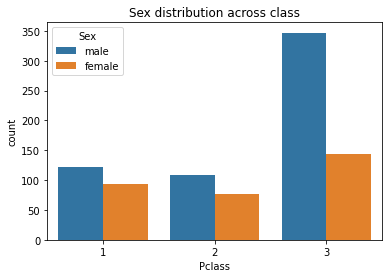

In [25]:
# countplot showing the sex of the passengers across the classes
sns.countplot(x='Pclass', hue='Sex', data=titanic_surv)
plt.title('Sex distribution across class')
plt.show()

We have more males in all the classes than female. 3rd class recorded the highest number of males and female passengers.

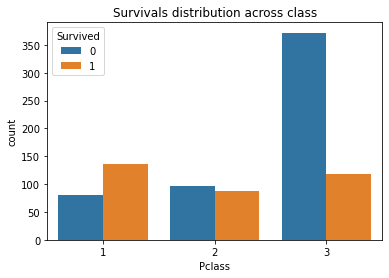

In [26]:
# countplot showing the classes of the passengers(survived or did not survive)
sns.countplot(x='Pclass', hue='Survived', data=titanic_surv)
plt.title('Survivals distribution across class')
plt.show()

More of the survivals were in the 1st class. Majority of the paasengers that died were in the 3rd class. Pclass affects a person's likelihood of surviving, particularly if they are in class 1

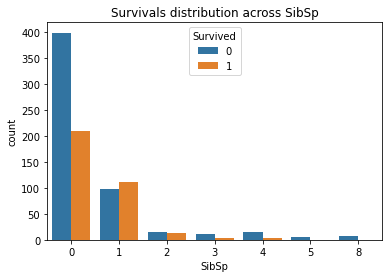

In [27]:
# countplot showing the count of siblings/spouse and they survived or did not survive
sns.countplot(x='SibSp', hue='Survived', data=titanic_surv)
plt.title('Survivals distribution across SibSp')
plt.show()

Most of the passengers that survived or did not survive did not have siblings/spouse on board. Passenger with 8 family members on board all did not survive.

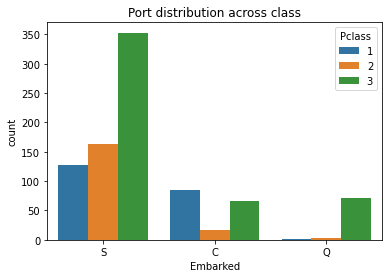

In [28]:
# countplot showing the ports each of the passengers in each class entered from
sns.countplot(x='Embarked', hue='Pclass', data=titanic_surv)
plt.title('Port distribution across class')
plt.show()

Most of the passengers that boarded from port S and Q were in the 3rd class. Most passengers that boarded in port C were in the 1st class.

<Figure size 504x504 with 0 Axes>

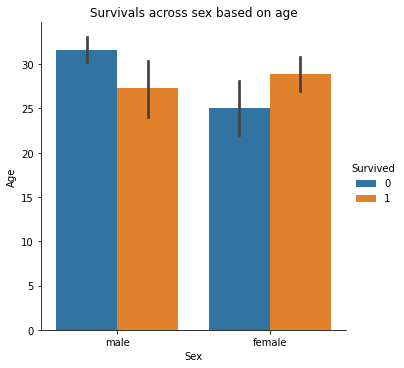

In [29]:
# catplot showing Survivals across sex based on age
plt.figure(figsize=(7,7))
sns.catplot(x='Sex', y='Age', hue='Survived', data=titanic_surv, kind = 'bar')
plt.title('Survivals across sex based on age')
plt.show()

From the catplot, we can see that the average age of the passengers that survived for females is about 28.70 years while male is about 27.78 years. The average of females that did not survive is about 25.65 years while for male is about 31.4 years. This can be confirmed with the mean computed previously.

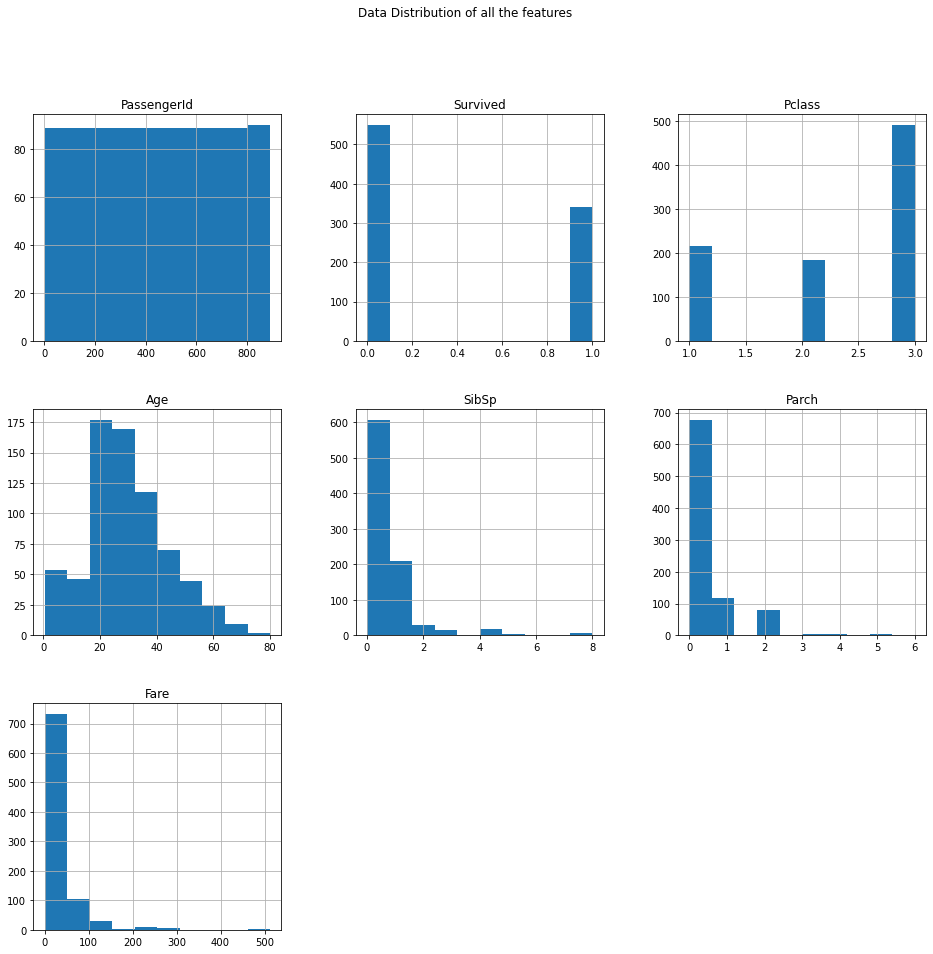

In [30]:
# Histogram containing all the columns
titanic_surv.hist(bins=10, figsize=(16,15))
plt.suptitle("Data Distribution of all the features")
plt.show()

Most of the numerical features are skewed to the right.

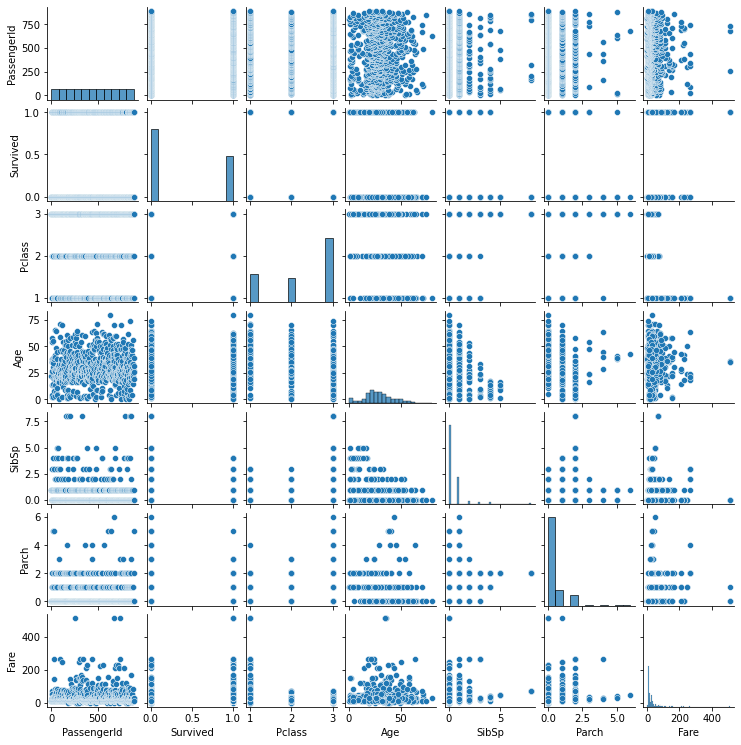

In [31]:
#pairplot showing the distribution of the variables
sns.pairplot(titanic_surv, diag_kind="hist", height=1.5, palette = 'husl')

There seems to be no relationship amongst most of the variables.

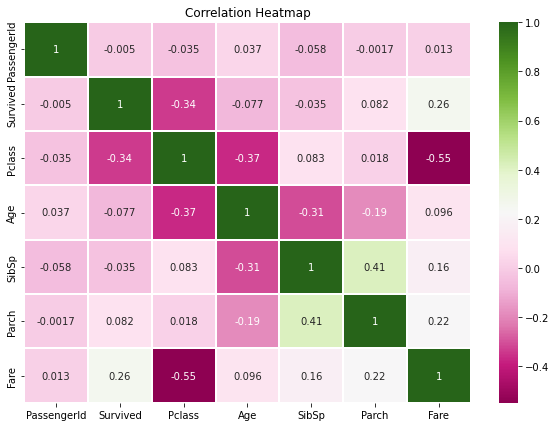

In [32]:
# Using heatmap to visualize the correlation between the numerical features.

plt.figure(figsize=(10,7))
sns.heatmap(titanic_surv.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

SibSp and Parch are highly correlated. Most variables are negatively correlated.

In [33]:
# Printing the total number of duplicates across all the columns
duplicated = titanic_surv.duplicated()

print("The number of duplicates in the dataset is:", titanic_surv.duplicated().sum())

The number of duplicates in the dataset is: 0


There are no duplicates in the dataset

### Data Preprocessing

In [34]:
#checking for missing values
titanic_surv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We are going to fill our miss values. For the embarked, we will fill the missing 2 values with S since most of the passengers embarked from port S. For the age we will fill the missing values with the mean age. We shall drop the Cabin column because it is not neccessary for the prediction of survivals.

In [35]:
#filling the missing data in the embarked column
titanic_surv["Embarked"].fillna("S", inplace = True)

In [36]:
#Average of age of each gender
titanic_surv['Age'].groupby([titanic_surv['Sex']]).mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

The mean age of the male passengers is 30.726645 and 27.915709 for female. We will use the mean to fill the missing values in the age column.

In [37]:
#displays the mean age of the male passengers
male_mean = titanic_surv[titanic_surv['Sex']=='male']['Age'].mean()
male_mean

30.72664459161148

In [38]:
#displays the mean age of the female passengers
female_mean = titanic_surv[titanic_surv['Sex']=='female']['Age'].mean()
female_mean

27.915708812260537

In [39]:
# Filling the missing values in the age column for male with the mean age for male
titanic_surv.loc[titanic_surv['Sex']=='male', 'Age'] = titanic_surv[titanic_surv['Sex']=='male']['Age'].fillna(value=male_mean)

In [40]:
# Filling the missing values in the age column for female with the mean age for female
titanic_surv.loc[titanic_surv['Sex']=='female', 'Age'] = titanic_surv[titanic_surv['Sex']=='female']['Age'].fillna(value=female_mean)

In [41]:
#checking for missing values
titanic_surv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [42]:
# Dropping the unimportant columns
titanic_surv1 = titanic_surv.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)


We dropped some of the columns that are not neccessary for the prediction of survivals.

In [43]:
#checking for missing values
titanic_surv1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now we have no missing values

In [44]:
#Viewing the first 10 rows of the dataset
titanic_surv1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,30.726645,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [45]:
#Converting the value of sex to numerics
titanic_surv1.replace({'female':0,'male':1},inplace=True)

In [46]:
#converting embarked column to dummy variable so as to take the value 0 or 1 
titanic_surv1 = pd.get_dummies(titanic_surv1,columns=['Embarked'],prefix='Embarked')

In [47]:
#Viewing the first 10 rows of the dataset after converting embarked column to a dummy variable
titanic_surv1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
5,0,3,1,30.726645,0,0,8.4583,0,1,0
6,0,1,1,54.000000,0,0,51.8625,0,0,1
7,0,3,1,2.000000,3,1,21.0750,0,0,1
8,1,3,0,27.000000,0,2,11.1333,0,0,1
9,1,2,0,14.000000,1,0,30.0708,1,0,0


In [48]:
# split data into x and y
X = titanic_surv1.drop('Survived',axis =1)
y = titanic_surv1['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0
2,3,0,26.000000,0,0,7.9250,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1
4,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1
887,1,0,19.000000,0,0,30.0000,0,0,1
888,3,0,27.915709,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


We dropped the Survived variable which is our target variable from the list of features in our dataset. We are going to be predicting whether a passenger survived or not using our independent variables. 

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X)
X_test=scaler.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.0,0.0,1.0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,1.0,0.0,0.345510,0.125,0.333333,0.045771,0.0,0.0,1.0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [50]:
from sklearn.model_selection import train_test_split
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

We are splitting our dataset into train and test. We are going to use 80% of our data to train the models and use 20% to validate the performance of our model. 
We have 712 data in our training. 179 data will be used validation. We have 9 independent variables

Feature Importances :  [0.15676016 0.60234594 0.03345559 0.0669451  0.02813023 0.04026742
 0.02708883 0.00889244 0.03611427]


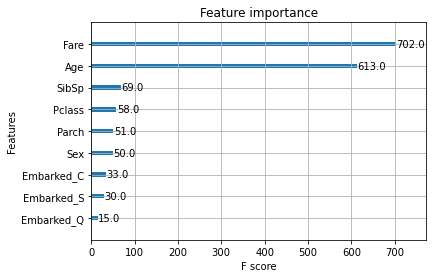

In [51]:
#import the neccessary libraries
from xgboost import XGBClassifier
from xgboost import plot_importance

# feature importance using xgboost classifier
model_xgb = XGBClassifier(random_state = 0 )
model_xgb.fit(X_train, y_train)

print("Feature Importances : ", model_xgb.feature_importances_)

# plot feature importance
plot_importance(model_xgb)
plt.show()

From the feature importance plot displayed above, we can say that the age of the passenger and the fare paid is importance in determining the possibility of survival. We are not going to drop any feature here. We shall train our model with all these features and test the performance of our model based on these features used.

# Model Building

## 1. Decision Tree

In [52]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)


The Accuracy for Decision Tree: 0.76


[[92 25]
 [18 44]]


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       117
           1       0.64      0.71      0.67        62

    accuracy                           0.76       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.77      0.76      0.76       179



### Cross Validation Score for Decision Tree

In [53]:
# Specify the cross-validation strategy
results = []

scores = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.74825175 0.8041958  0.73239437 0.81690141 0.73239437]
Mean accuracy: 0.77


The difference between the accuracy score and the cross validation score is: -0.00705100234567535


## 2. Random Forest

In [54]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.80


[[100  17]
 [ 18  44]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.72      0.71      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



#### Cross Validation Score for Random Forest

In [55]:

scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.79020979 0.85314685 0.78873239 0.85915493 0.78873239]
Mean accuracy: 0.82


The difference between the accuracy score and the cross validation score is: -0.011525998590283693


## 3. Logistic Regression

In [56]:
# Create a Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, lr_pred)
print(f"The Accuracy for Logistic Regression is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, lr_pred)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Logistic Regression is: 0.83


[[102  15]
 [ 15  47]]


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.76      0.76      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



#### Cross Validation Score for Logistic Regression

In [57]:
scores = cross_val_score(lr, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Logistic Regression',accuracy, mean_score, diff])

Cross-validation scores: [0.78321678 0.79020979 0.74647887 0.87323944 0.72535211]
Mean accuracy: 0.78


The difference between the accuracy score and the cross validation score is: 0.04870283544451448


## 4. Support Vector Machines (SVM)

In [58]:
from sklearn import svm

svm = svm.SVC(decision_function_shape = 'ovo')
svm.fit(X_train, y_train)
prediction_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, prediction_svm)
# Display a classification report for more detailed metrics
print(f"The Accuracy for SVM is: ", accuracy)
print('\n')

print(confusion_matrix(y_test, prediction_svm))
print(classification_report(y_test, prediction_svm))

The Accuracy for SVM is:  0.8268156424581006


[[106  11]
 [ 20  42]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       117
           1       0.79      0.68      0.73        62

    accuracy                           0.83       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.83      0.82       179



#### Cross Validation Score for Support Vector Machines

In [59]:

scores = cross_val_score(svm, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Support Vector Machine',accuracy, mean_score, diff])

Cross-validation scores: [0.8041958  0.83216783 0.76056338 0.84507042 0.76056338]
Mean accuracy: 0.80


The difference between the accuracy score and the cross validation score is: 0.02630347856565507


## 5. Xgboost Classifier

In [60]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.7932960893854749


[[93 24]
 [13 49]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       117
           1       0.67      0.79      0.73        62

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.81      0.79      0.80       179



#### Cross Validation Score for Xgboost Classifier

In [61]:

scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.7972028  0.86013986 0.76760563 0.87323944 0.77464789]
Mean accuracy: 0.81


The difference between the accuracy score and the cross validation score is: -0.021271033632352387


#### Difference between accuracy and Cross Validtion Score

In [62]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Decision Tree,0.759777,0.766828,-0.007051
1,Random Forest,0.804469,0.815995,-0.011526
2,Logistic Regression,0.832402,0.783699,0.048703
3,Support Vector Machine,0.826816,0.800512,0.026303
4,Xgboost Classifier,0.793296,0.814567,-0.021271


#### Selection of the best model

In [63]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Xgboost Classifier


#### ROC curve  and AUC of the best model

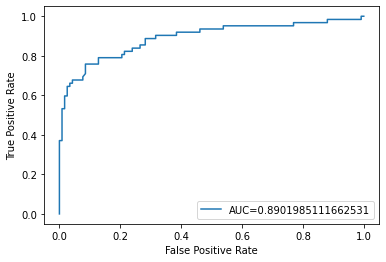

In [64]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 89%

In [65]:
from sklearn.model_selection import GridSearchCV

model_best = XGBClassifier()

model_param = {
    
    'n_estimators': [100,500,550],
    'max_depth': [None],
    'learning_rate':[0.1,0.5],
    'gamma':[0,0.5,1,2,3],
    'sampling_method': ['uniform']
    }

In [66]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [67]:
#display the best parameters from the search

print("The best n_estimators is : " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best learning_rate: " + str(gd_search.best_params_["learning_rate"]),
      "\nThe best gamma: " + str(gd_search.best_params_["gamma"]),
     "\nThe best sampling_method: " + str(gd_search.best_params_["sampling_method"]))

The best n_estimators is : 100 
The best max_depth: None 
The best learning_rate: 0.1 
The best gamma: 0 
The best sampling_method: uniform


In [72]:
# train the model with the selected parameters
wine_model = XGBClassifier(n_estimators  = 100, max_depth = None, learning_rate = 0.1, gamma = 0, sampling_method = 'uniform')
wine_model.fit(X_train, y_train)
y_pred = wine_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8379888268156425

In [73]:
import pickle
# save the model to disk
filename = 'titanic_red.sav'
pickle.dump(wine_model, open(filename, 'wb'))

In [74]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
accuracy_dataframe

,Actual,Predicted
169,0,1
556,1,1
206,0,0
71,0,0
677,1,0
...,...,...
6,0,0
102,0,0
772,0,1
738,0,0


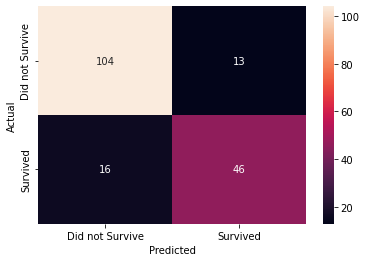

In [75]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
label=['Did not Survive', 'Survived']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Conclusion

Xgboost Classifier is our best model because it had a lower difference between accuracy and cross validation score. The accuracy score before tuning was 0.793296 and after tuning with set parameters, the model's accuracy increased to 0.83798. There was an improvement in the accuracy after tuning. 
Testing the performance of the model, we can see that from the 10 predictions made, the model was able to predict 6 correctly. We can also see from the confusion matrix that the model predicted that 104 Did not survive and actually they Did not survive (True Negative). It predicted 46 Survived and they did Survived (True Positive). The model predicted that 16 did not survive whereas, they survived (False Negative). Predicted 13 Survived while they Did not survive (False Positive). For a better model performance, we will need to train with more data.